In [24]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
df = pd.read_csv('../data/raw/ranked_10min.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [27]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


<Axes: >

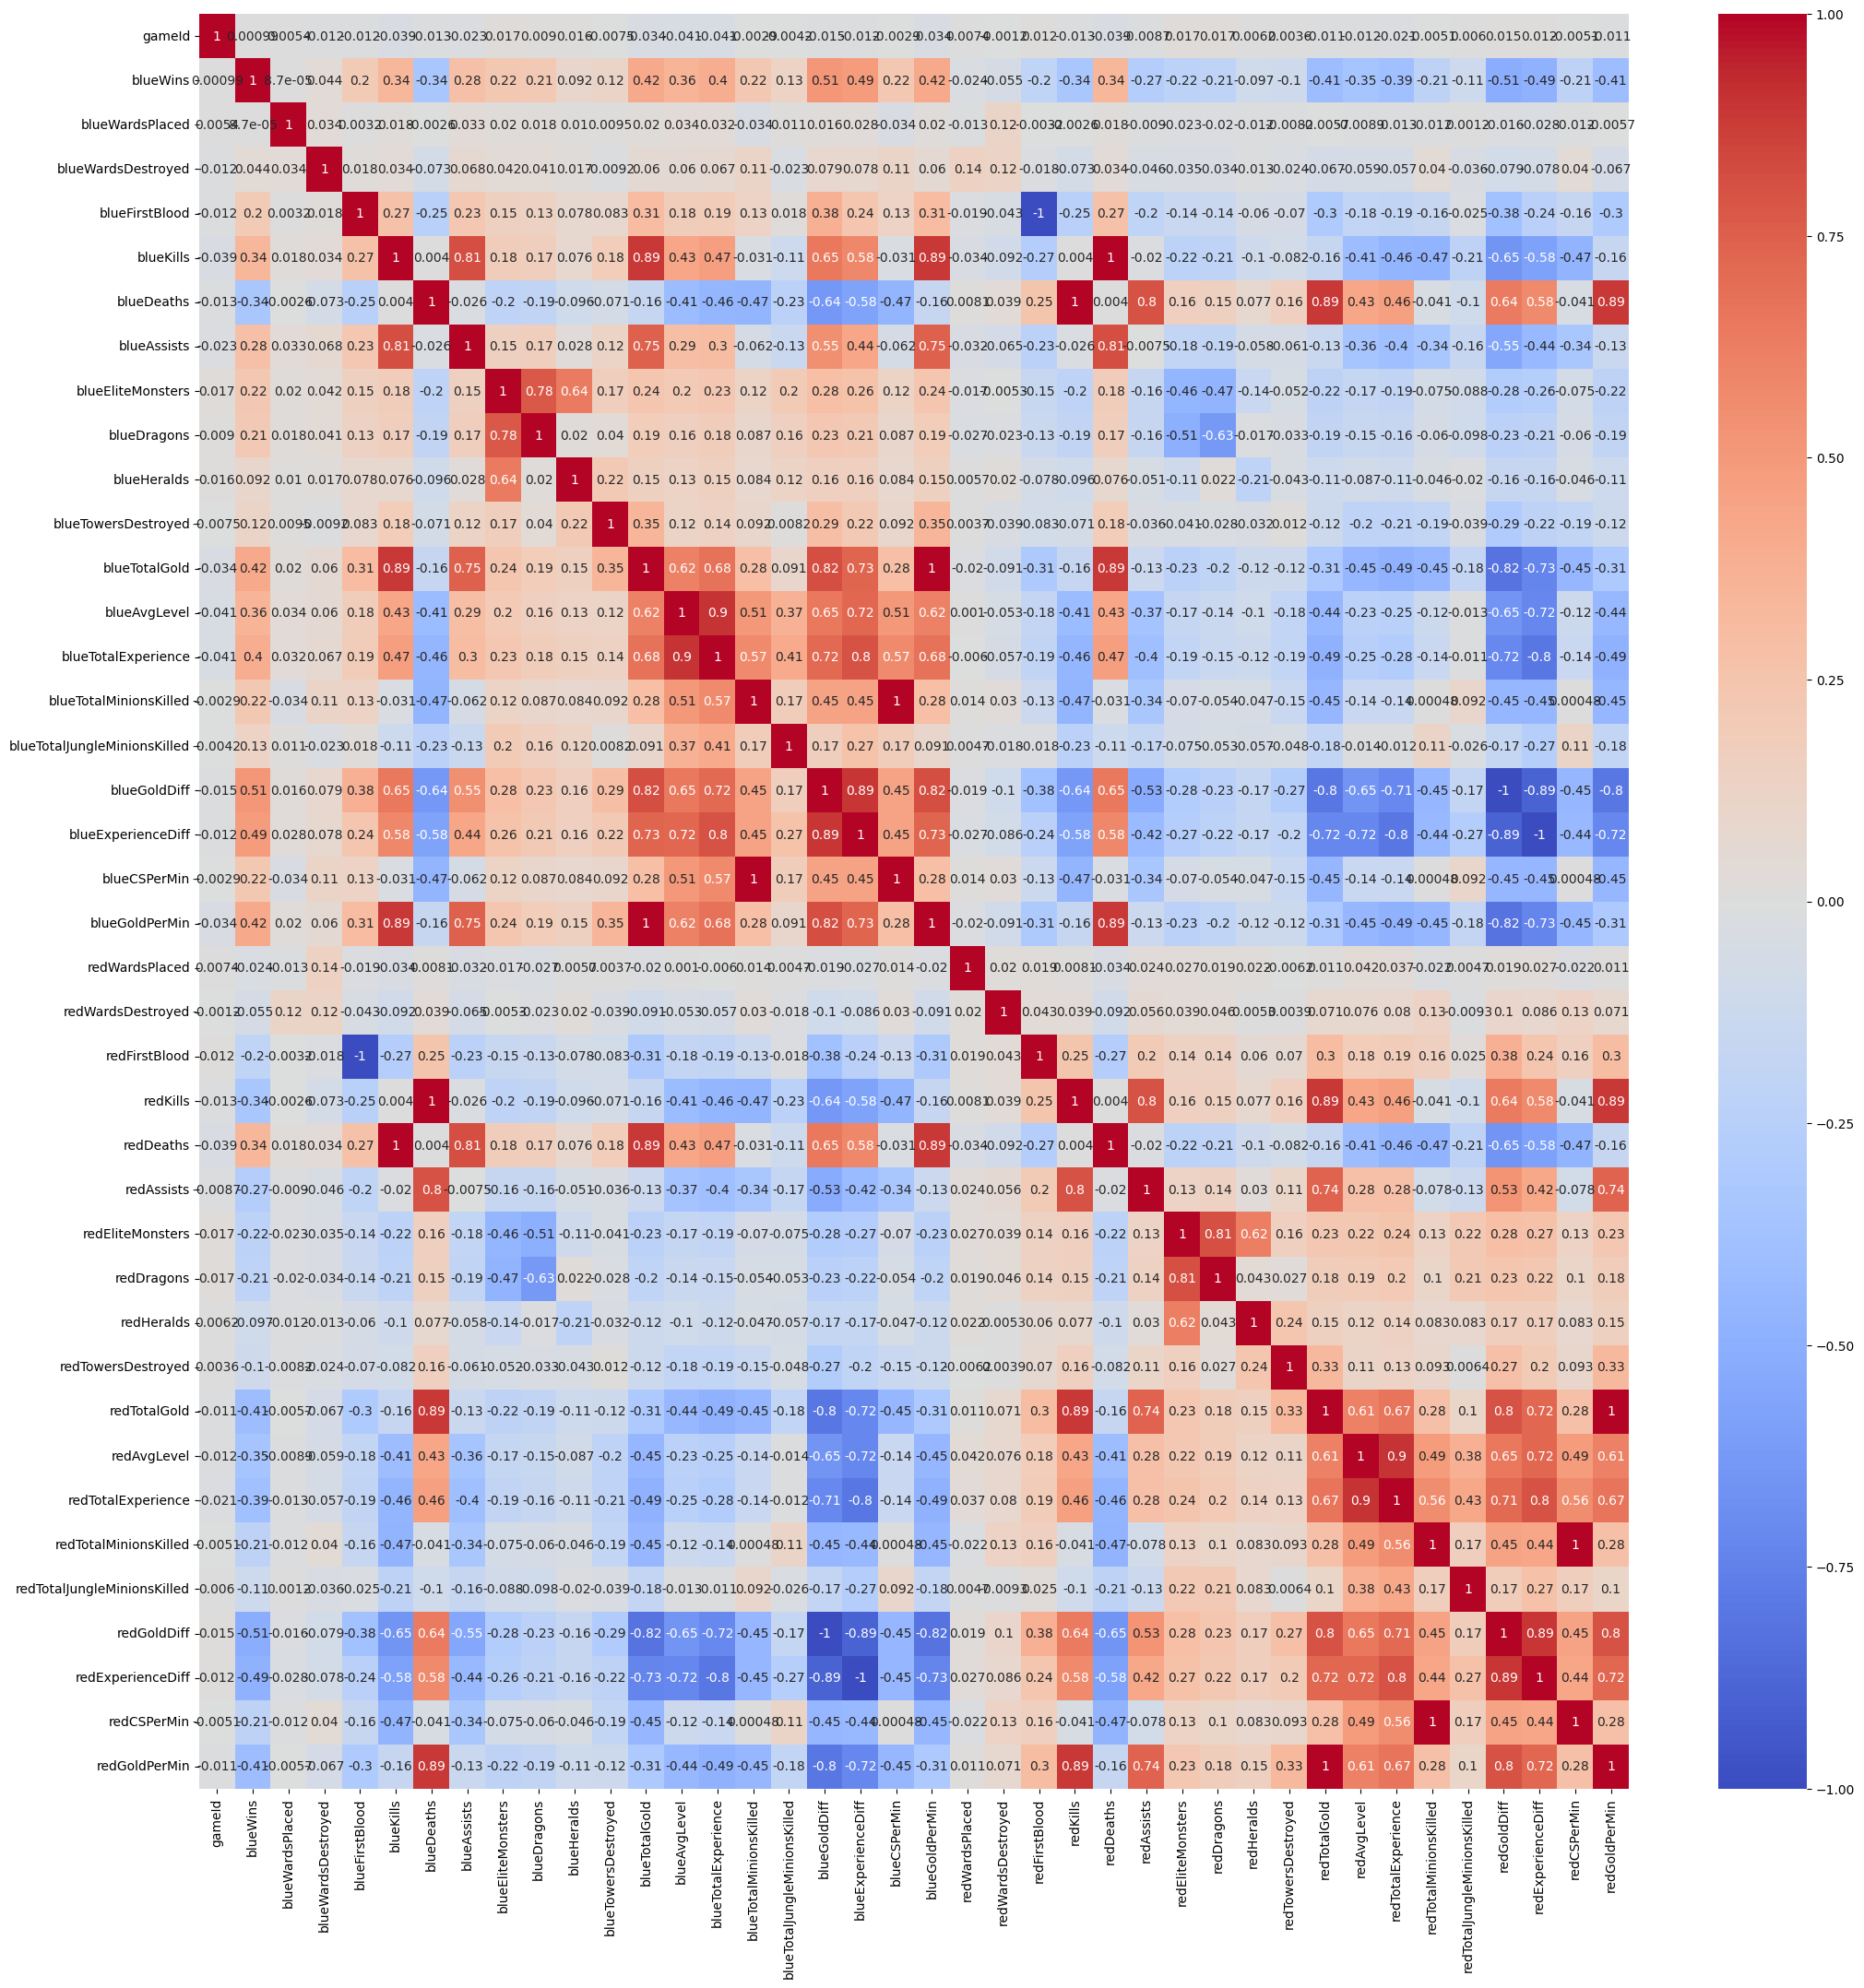

In [28]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(numeric_only=True),vmin=-1,annot=True,cmap='coolwarm')

In [29]:
df = df.drop(columns=['blueTotalExperience','redTotalExperience','blueGoldDiff','redGoldDiff','blueExperienceDiff','blueCSPerMin','redCSPerMin','blueEliteMonsters','redEliteMonsters','blueDeaths','redDeaths','blueFirstBlood','blueTotalJungleMinionsKilled','redTotalJungleMinionsKilled','redExperienceDiff','redWardsDestroyed','blueWardsDestroyed','gameId','blueGoldPerMin','redGoldPerMin',"blueWardsPlaced","redWardsPlaced"])

<Axes: >

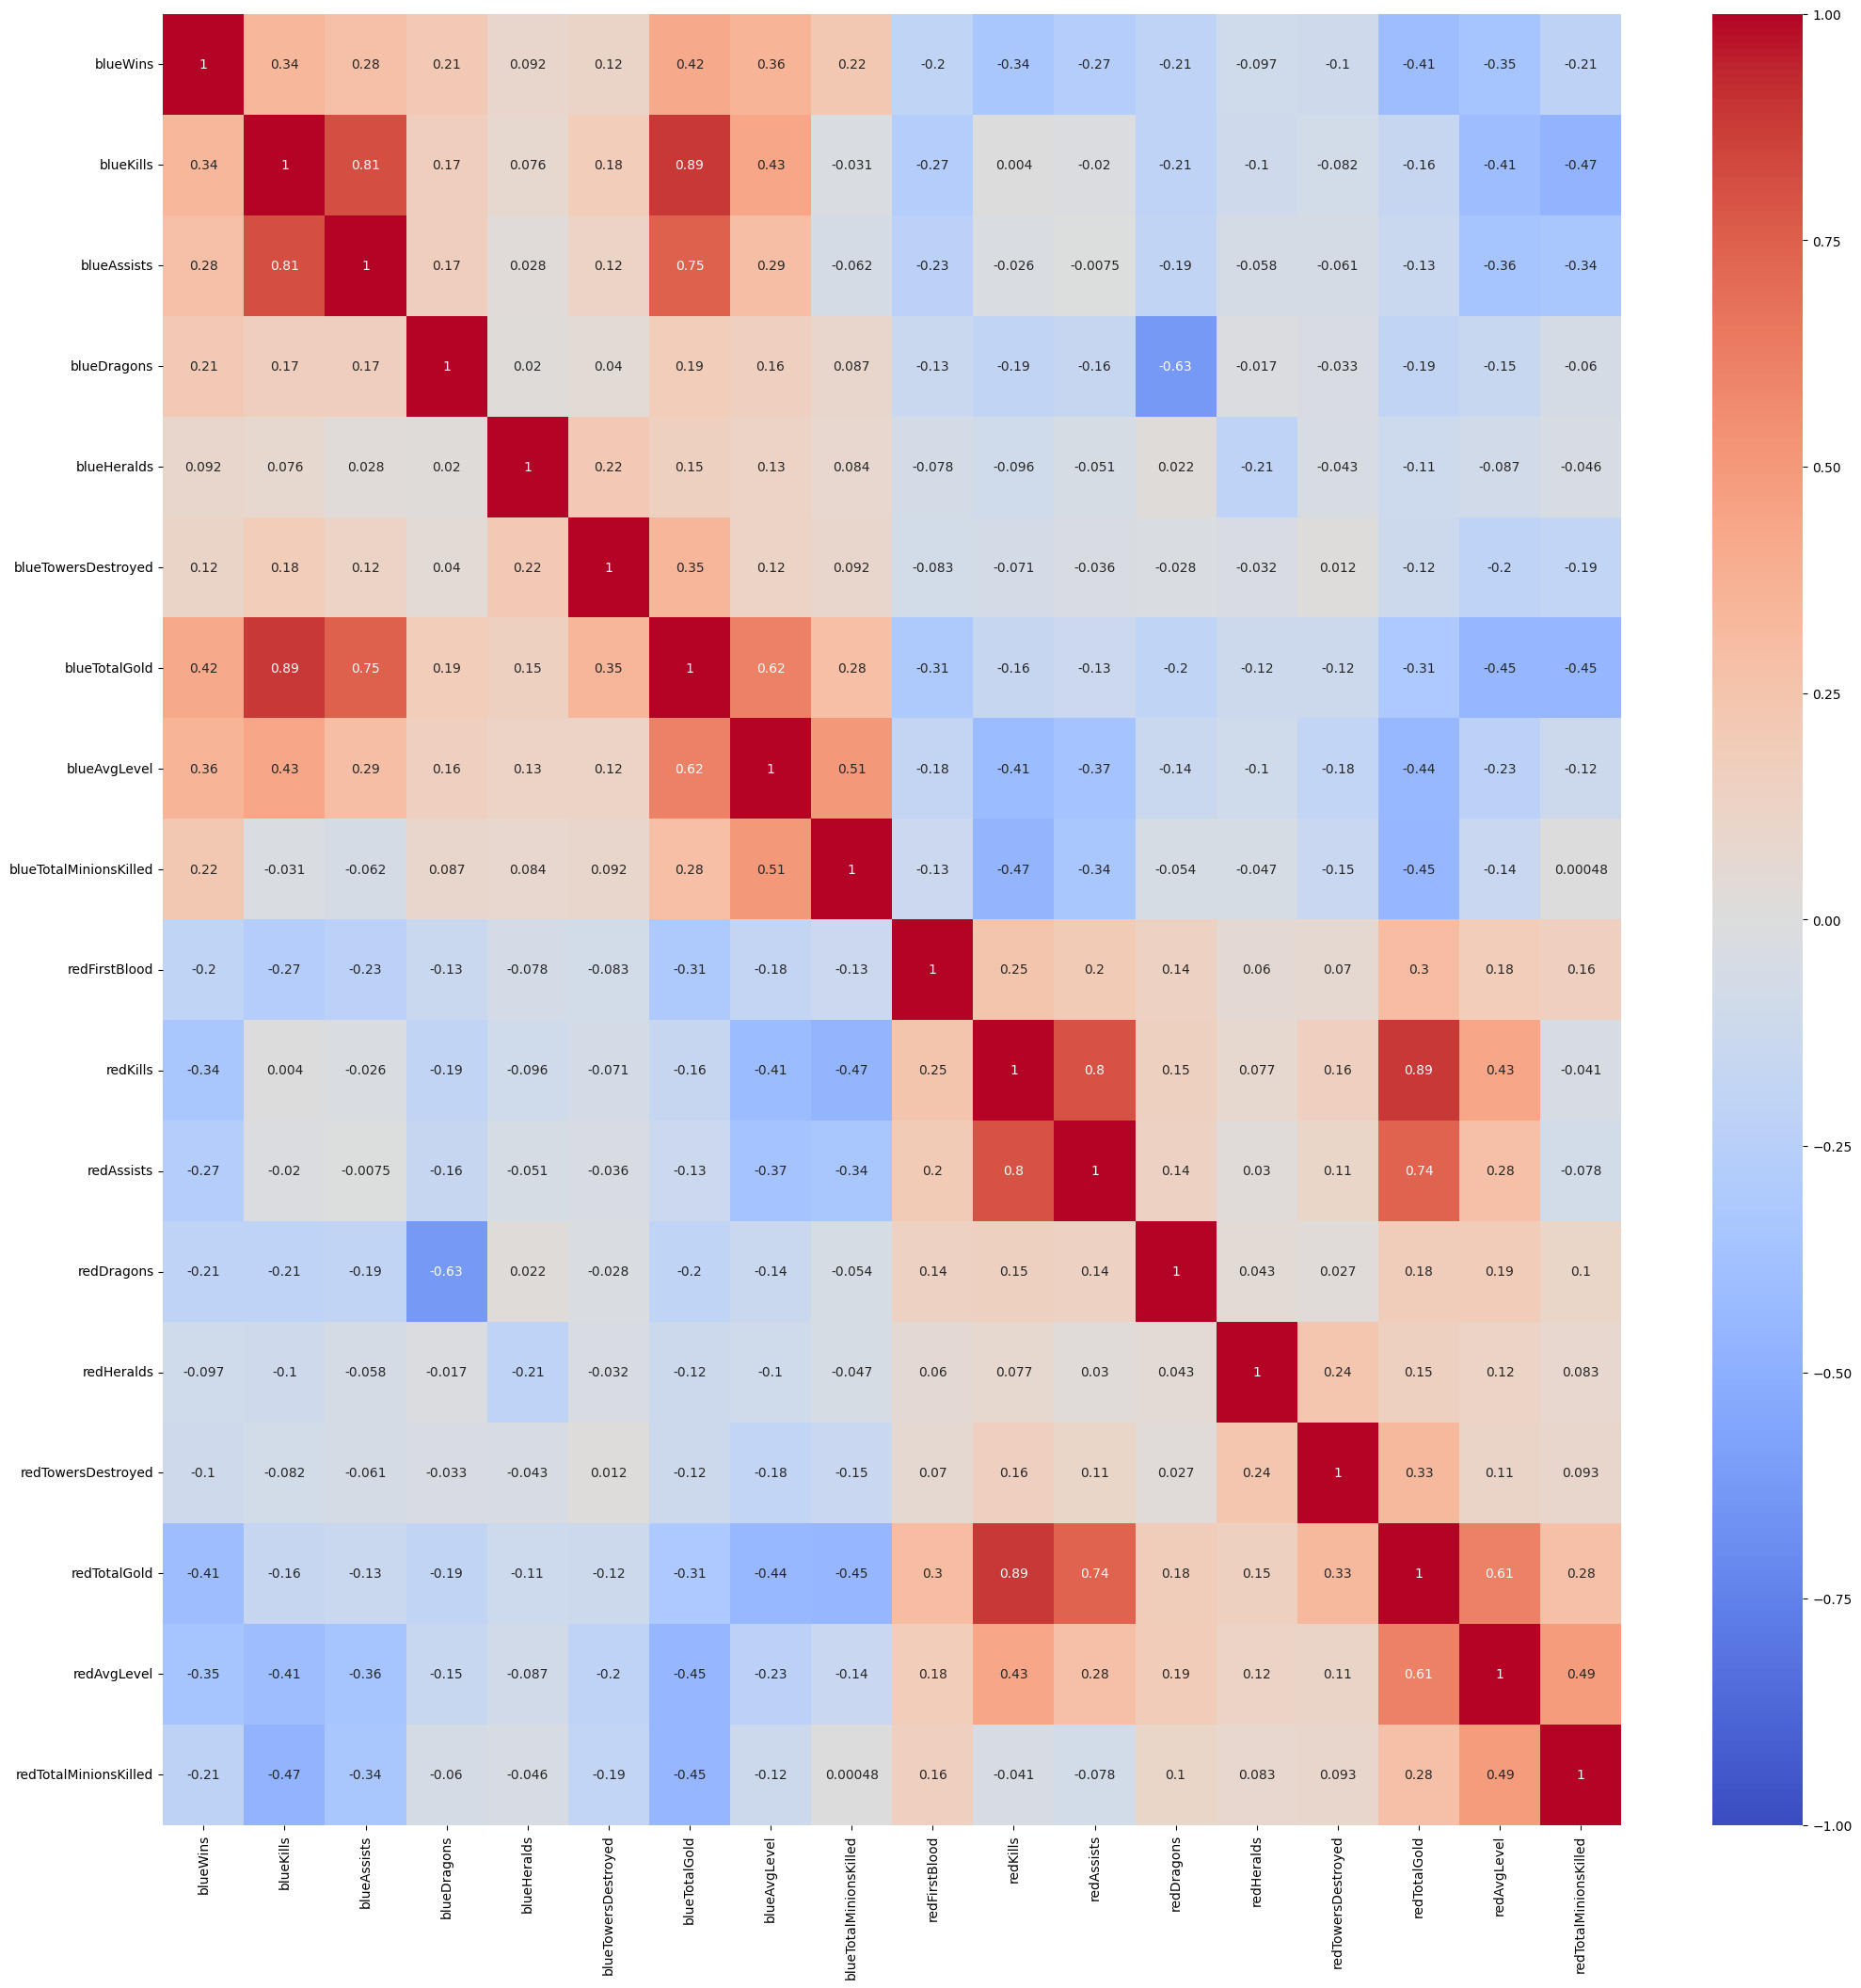

In [30]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(numeric_only=True),vmin=-1,annot=True,cmap='coolwarm')

In [31]:
df['blueWins'] = df['blueWins'].replace({0: 1, 1: 0})


In [32]:
df = df.rename(columns={'blueWins':'equipo_ganador'})

In [33]:
df = df.rename(columns={'redFirstBlood':'equipo_primera_sangre'})

In [34]:
df = df.rename(columns={'blueKills':'azul_asesinatos'})
df = df.rename(columns={'redKills':'rojo_asesinatos'})
df = df.rename(columns={'blueAssists':'azul_asistencias'})
df = df.rename(columns={'redAssists':'rojo_asistencias'})
df = df.rename(columns={'blueTotalGold':'azul_oro'})
df = df.rename(columns={'redTotalGold':'rojo_oro'})
df = df.rename(columns={'blueAvgLevel':'azul_nivel_medio'})
df = df.rename(columns={'redAvgLevel':'rojo_nivel_medio'})
df = df.rename(columns={'blueTotalMinionsKilled':'azul_subditos'})
df = df.rename(columns={'redTotalMinionsKilled':'rojo_subditos'})
df = df.rename(columns={'blueTowersDestroyed':'azul_torretas_destruidas'})
df = df.rename(columns={'redTowersDestroyed':'rojo_torretas_destruidas'})
df = df.rename(columns={'blueDragons':'azul_dragones'})
df = df.rename(columns={'redDragons':'rojo_dragones'})
df = df.rename(columns={'blueHeralds':'azul_heraldos'})
df = df.rename(columns={'redHeralds':'rojo_heraldos'})

In [35]:
df["asesinatos_dif"] = df["azul_asesinatos"] - df["rojo_asesinatos"]
df["asistencias_dif"] = df["azul_asistencias"] - df["rojo_asistencias"]
df["oro_dif"] = df["azul_oro"] - df["rojo_oro"]
df["nivel_dif"] = df["azul_nivel_medio"] - df["rojo_nivel_medio"]
df["minions_dif"] = df["azul_subditos"] - df["rojo_subditos"]
df["torretas_dif"] = df["azul_torretas_destruidas"] - df["rojo_torretas_destruidas"]
df["dragones_dif"] = df["azul_dragones"] - df["rojo_dragones"]
df["heraldos_dif"] = df["azul_heraldos"] - df["rojo_heraldos"]

In [36]:
df = df.drop(columns=["azul_asesinatos",'rojo_asesinatos',"azul_asistencias", "rojo_asistencias","azul_oro", "rojo_oro","azul_nivel_medio", "rojo_nivel_medio", "azul_subditos","rojo_subditos","azul_torretas_destruidas","rojo_torretas_destruidas", "azul_dragones", "rojo_dragones","azul_heraldos","rojo_heraldos"])

<Axes: >

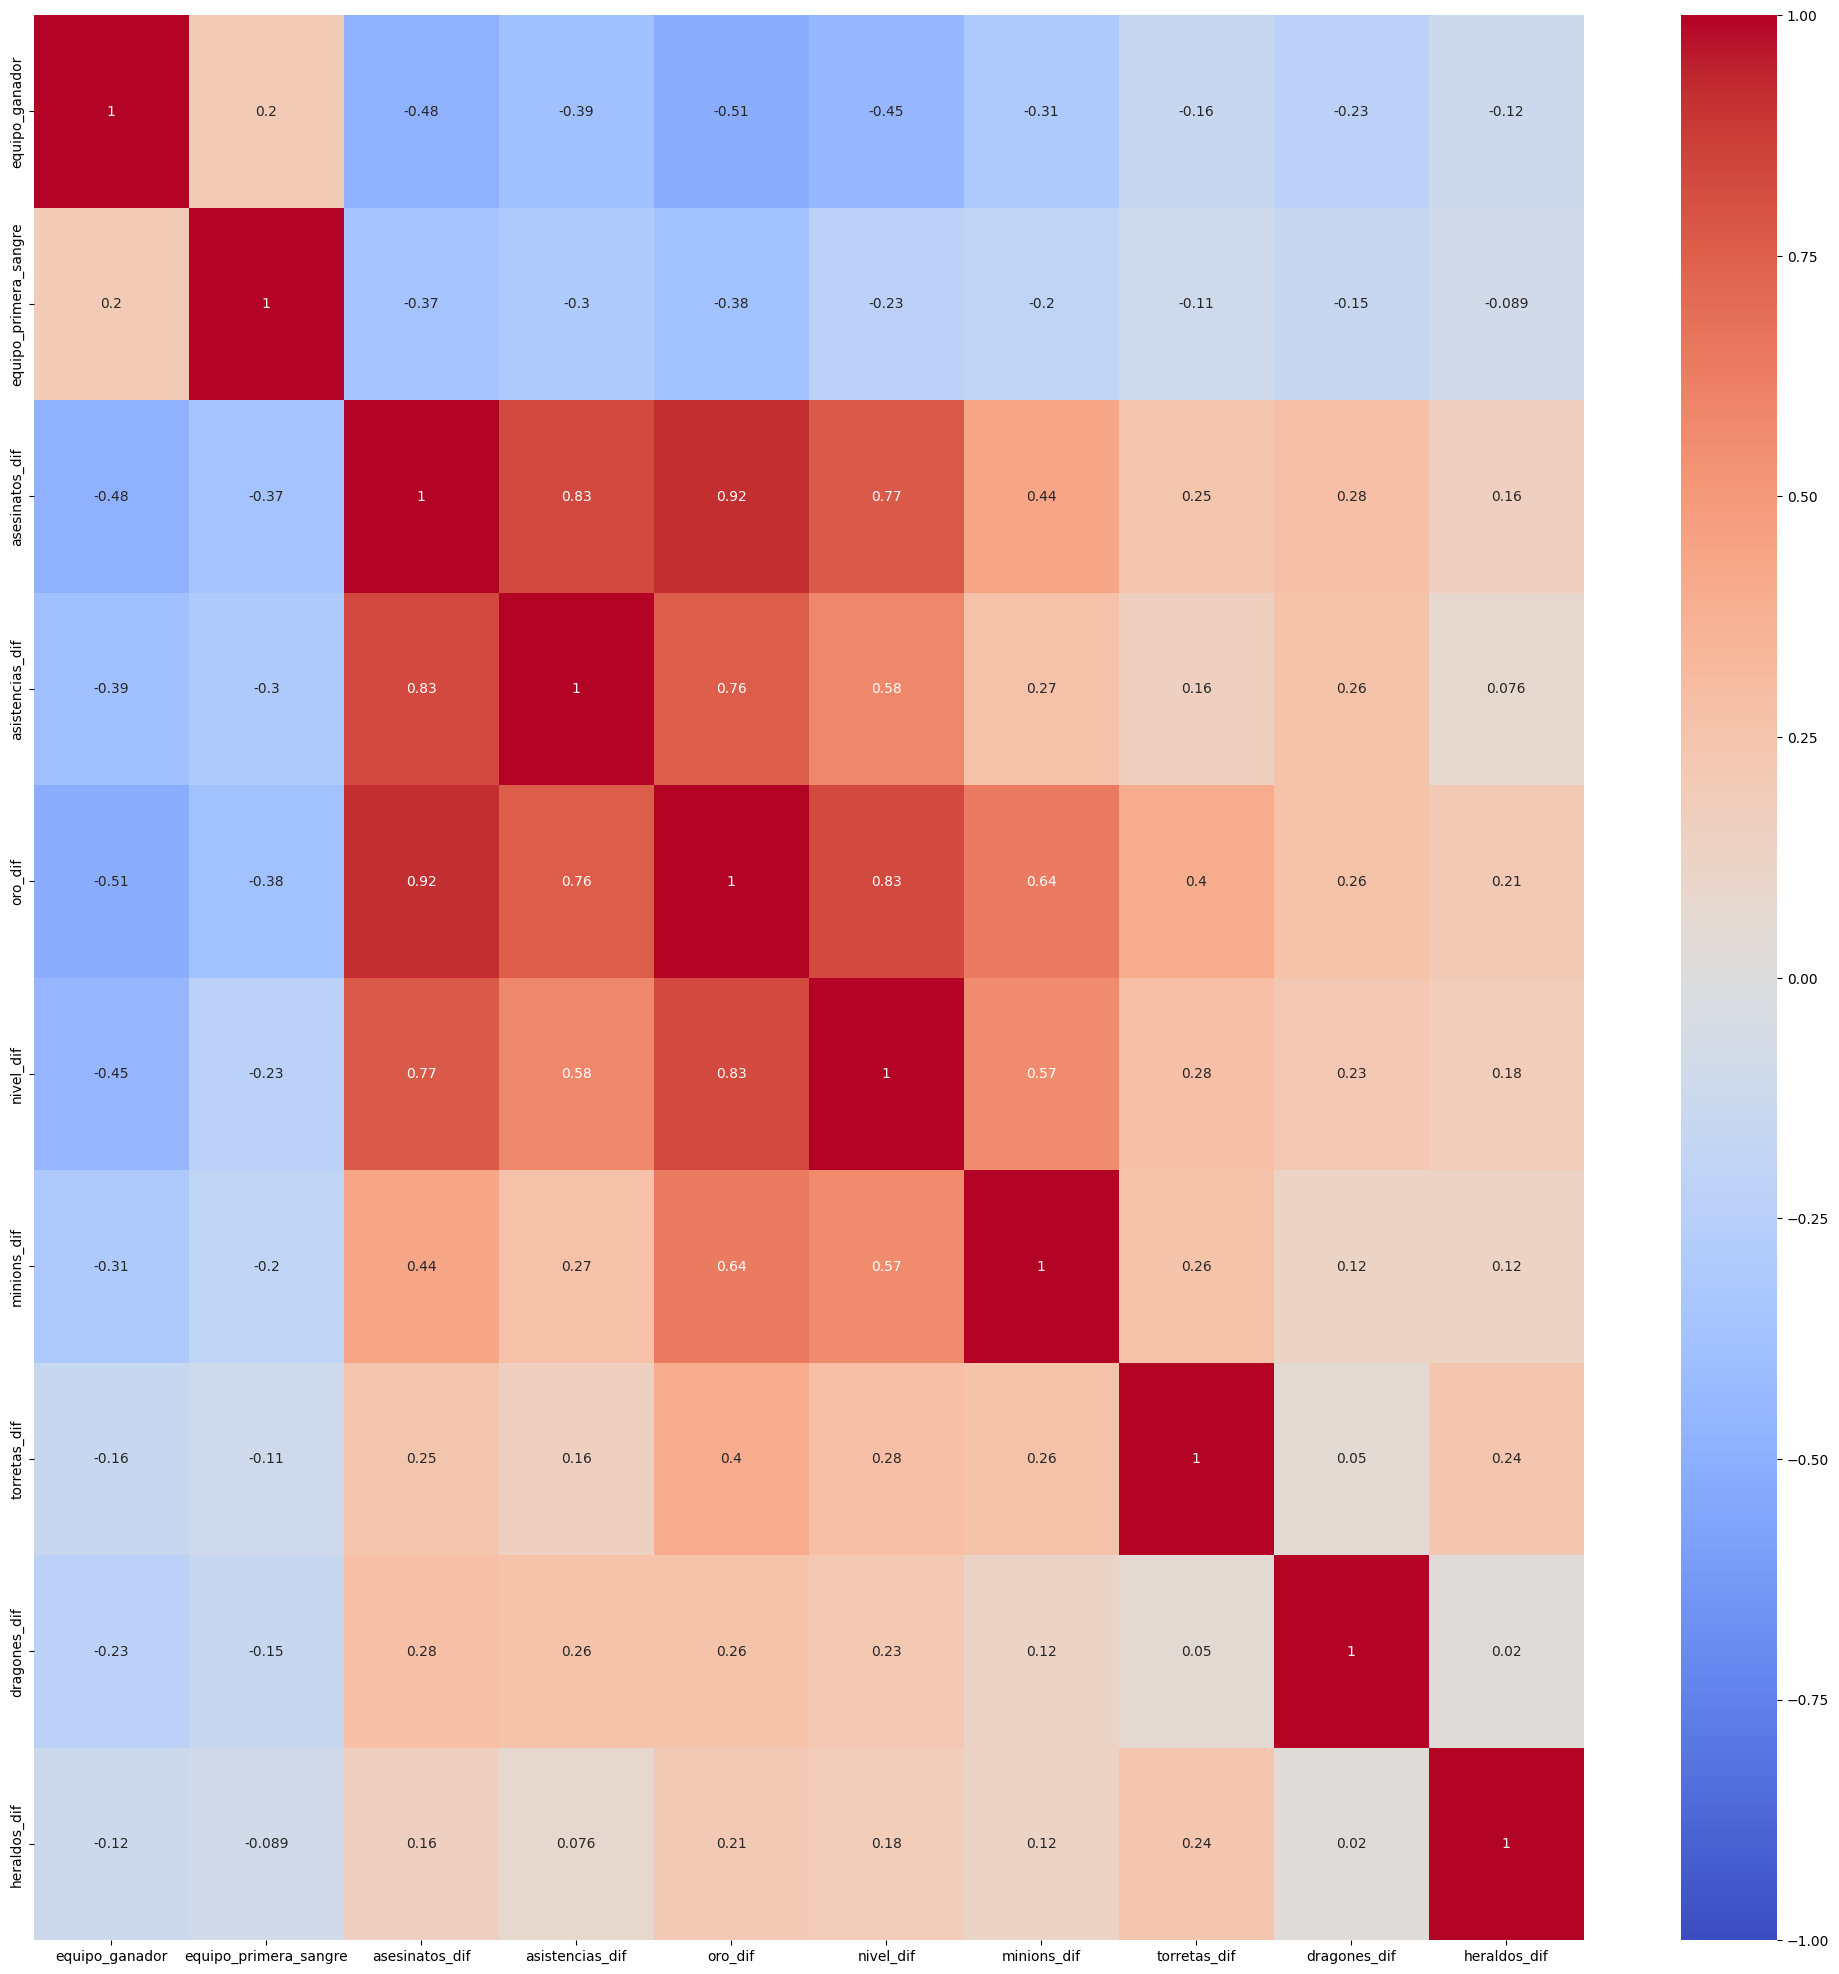

In [37]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(numeric_only=True),vmin=-1,annot=True,cmap='coolwarm')

In [39]:
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['equipo_ganador'])


In [40]:
os.makedirs("../data/processed", exist_ok=True)
os.makedirs("../data/train", exist_ok=True)
os.makedirs("../data/test", exist_ok=True)

df.to_csv("../data/processed/processed.csv", index=False)
train.to_csv("../data/train/train.csv", index=False)
test.to_csv("../data/test/test.csv", index=False)

print("Archivos guardados correctamente.")


Archivos guardados correctamente.
